In [11]:
import time
import emcee
import corner
import numpy as np
import pandas as pd
from multiprocessing import Pool
from mcmc import lnlike
from mock_cmd import MockCMD
import matplotlib.pyplot as plt
plt.style.use("default")

In [12]:
isochrones_dir = '/home/shenyueyue/Projects/Cluster/data/isocForMockCMD/'
name = 'Melotte_22'
usecols = ['Gmag','G_BPmag','G_RPmag','phot_g_n_obs','phot_bp_n_obs','phot_rp_n_obs']
sample_obs = pd.read_csv("/home/shenyueyue/Projects/Cluster/data/Cantat-Gaudin_2020/%s.csv"%(name), usecols=usecols)
sample_obs = sample_obs.dropna().reset_index(drop=True)

In [13]:
n_stars = 100000
step = (0.05, 0.2)
# parameter
theta_part = np.array([7.80,0.03]) # after round theta = (8.00, 0.0)  Dias+,2021:8.116,0.032 Cantat-Gaudin+,2020:7.89
ndim = 2

In [14]:
nwalkers = 20
method="hist2point"
scale = np.array([0.1, 0.1])
p0 = np.round((theta_part + scale * np.random.randn(nwalkers, ndim)), decimals=2)
# parallelization
with Pool(30) as pool:   
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnlike, args=(n_stars, step, sample_obs, method), pool=pool) # , moves=moves
    nburn = 2000
    start_burn = time.time()
    pos,_,_ = sampler.run_mcmc(p0, nburn, progress=True)
    end_burn = time.time()
    time_burn = end_burn - start_burn
    print(f"time : {time_burn:.1f} seconds")

 10%|█         | 202/2000 [12:30<1:46:31,  3.55s/it]/home/shenyueyue/Projects/Cluster/code/point_source/gaia_magerror.py:164: RuntimeWarning: divide by zero encountered in log10
  ( 10**(self.spline_bp(sample_syn[self.bands[1]]) - np.log10( np.sqrt(bp_n_obs)/np.sqrt(20) )) /0.67 )**2
 10%|█         | 203/2000 [12:33<1:47:20,  3.58s/it]/home/shenyueyue/Projects/Cluster/code/point_source/gaia_magerror.py:164: RuntimeWarning: divide by zero encountered in log10
  ( 10**(self.spline_bp(sample_syn[self.bands[1]]) - np.log10( np.sqrt(bp_n_obs)/np.sqrt(20) )) /0.67 )**2
/home/shenyueyue/Projects/Cluster/code/point_source/gaia_magerror.py:164: RuntimeWarning: divide by zero encountered in log10
  ( 10**(self.spline_bp(sample_syn[self.bands[1]]) - np.log10( np.sqrt(bp_n_obs)/np.sqrt(20) )) /0.67 )**2
/home/shenyueyue/Projects/Cluster/code/point_source/gaia_magerror.py:164: RuntimeWarning: divide by zero encountered in log10
  ( 10**(self.spline_bp(sample_syn[self.bands[1]]) - np.log10( np.sqrt(

time : 7165.0 seconds


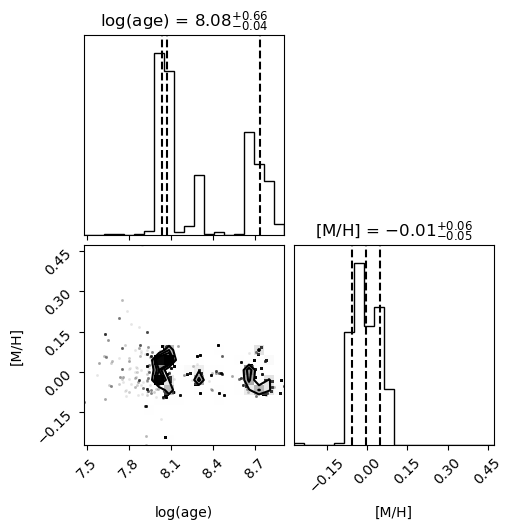

In [7]:
corner.corner(
    sampler.flatchain,
    labels=[r'log(age)',r'[M/H]',r'$f_b$',r'DM'],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True, 
    title_kwargs={"fontsize": 12},
    title_fmt = '.2f'
);

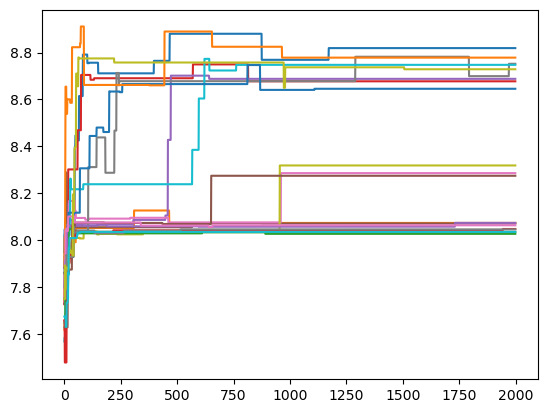

In [9]:
samples = sampler.get_chain()
plt.plot(samples[:,:,0]);

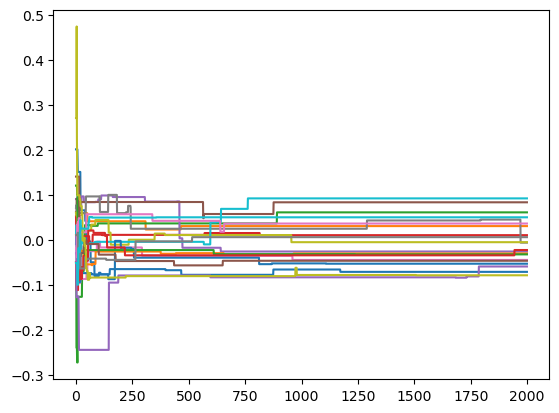

In [10]:
plt.plot(samples[:,:,1]);

Text(0.5, 0, 'step number')

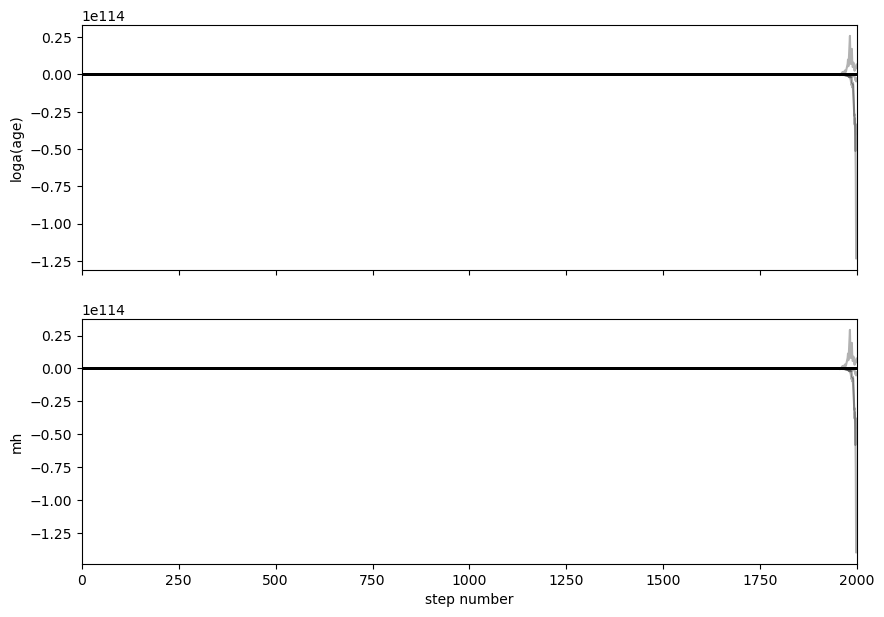

In [31]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["loga(age)", "mh", ]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    #ax.set_ylim(-100,100)
    #ax.set_xlim(0,1900)
axes[-1].set_xlabel("step number")

(0.0, 5e+112)

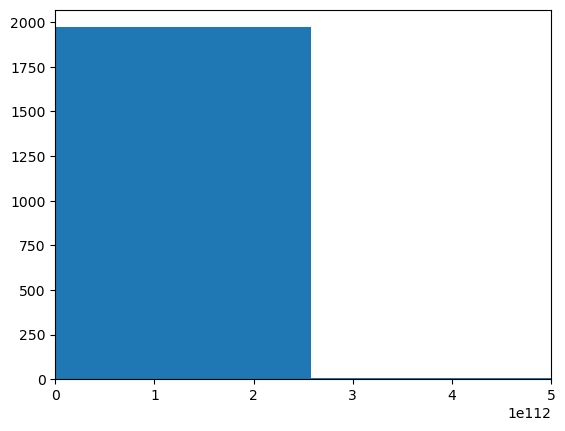

In [36]:
plt.plot(sampler)

(0.0, 1700.0)

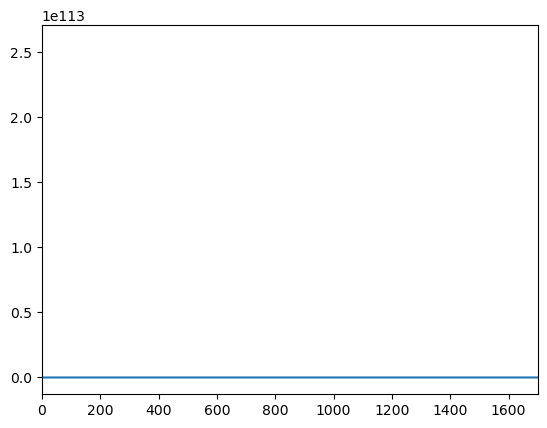

In [47]:
plt.plot(samples[:,2,0])
plt.xlim(0,1700)

In [50]:
pd.DataFrame(samples[:,:,0]).to_csv("/home/shenyueyue/Projects/Cluster/data/check/chain_logage.csv",index=False)
pd.DataFrame(samples[:,:,1]).to_csv("/home/shenyueyue/Projects/Cluster/data/check/chain_mh.csv",index=False)